# Project: Geo-pulse - Exploratory Data Analysis

---

## 1. Importing Libraries

In [1]:
# General Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2. Preparation

**Reading the data**

In [2]:
df = pd.read_csv('../data/geo_cleaned.csv', index_col = [0])

**Grouping of columns**

In [3]:
# Grouping of tally column
PAID = ['pre_paid','post_paid']
GENDER = ['gender_male', 'gender_female', 'gender_unknown']
AGE = ['age_1_19','age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60+']
PLAN = ['pay_no_payment', 'pay_0to99', 'pay_100to199',
        'pay_200to599','pay_600to999', 'pay_1000+']
USER = ['music_streamer_user','video_streaming_app_user', 'merchant_app_user',
        'bank_app_user','fastfood_app_user', 'food_delivery_app_user',
        'grocery_delivery_app_user', 'online_shopping_user']
INTE = ['inte_coffee_lover', 'inte_travel_and_information', 'inte_investment',
       'inte_realestate', 'inte_insurance', 'inte_automobile',
       'inte_fitness_and_wellness',]

col_cat = [GENDER,AGE,PAID,PLAN,USER,INTE]
col_cat_name = ['Gender','Age','Post/Pre Paid',
                'Package Plan','Usage','Interests']

In [4]:
# Grouping of percentage column
PCT_GENDER = df.columns[df.columns.str.contains('pct_gender')].to_list()
PCT_AGE = df.columns[df.columns.str.contains('pct_age')].to_list()
PCT_PAID = df.columns[df.columns.str.contains('pct_..._paid',regex=True)].to_list()
PCT_PLAN = df.columns[df.columns.str.contains('pct_pay')].to_list()
PCT_USER = ['pct_video_streaming_app_user','pct_merchant_app_user',
         'pct_bank_app_user', 'pct_fastfood_app_user',
         'pct_food_delivery_app_user', 'pct_grocery_delivery_app_user']
PCT_INTE = ['pct_inte_coffee_lover', 'pct_inte_travel_and_information',
         'pct_inte_investment', 'pct_inte_realestate', 'pct_inte_insurance',
         'pct_inte_automobile', 'pct_inte_fitness_and_wellness']

col_pct_cat = [PCT_GENDER, PCT_AGE, PCT_PAID, PCT_PLAN, PCT_USER, PCT_INTE]
col_pct_cat_name = ['% Gender','% Age','% Post/Pre Paid','% Package Plan',
                    '% App Users', '% Interests']

## 3. Exploratory Data Analysis

### 3.1 Distribution of our sampled segment throughout the day - fairness check

In [5]:
# checking the highest count of areas - each row of the dataset correspond to an areacode
pd.crosstab(df['hour'],df['segment']).T\
.style.background_gradient(axis=None)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
segment,,,,,,,,,,,,,,,,,,,,,,,,
resident,8,13,12,17,15,7,9,7,5,3,2,5,7,2,2,2,5,1,9,11,10,9,11,10
visitor,9,13,10,7,7,13,13,10,13,14,11,19,15,15,16,15,13,17,14,16,19,8,18,7
work_at_home,19,13,17,12,13,18,20,11,12,12,14,15,14,19,18,14,13,21,16,17,13,14,23,12
worker,1,1,0,0,2,0,3,5,7,4,12,18,13,9,8,10,9,4,5,4,2,3,3,5


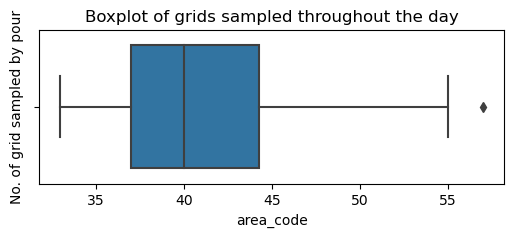

In [6]:
# checking if we've sampled by time fairly
grouped = df.groupby('hour').count()['area_code'].to_frame()

fig, ax = plt.subplots(figsize=(6,2))
plt.title('Boxplot of grids sampled throughout the day')
ax.set_ylabel('No. of grid sampled by pour')
ax.set_ylim([0,100])
sns.boxplot(data=grouped,x='area_code');

**Interpretation:**
- Since this sample happened on a weekday, we can see that light gradient of workers during non-work hours
- On the contrary, we see a resident gradient being light during working hours
- The distribution of area sampled by the hour is acceptably fair as there is only 1 outlier

### 3.2 Town density throughout the day

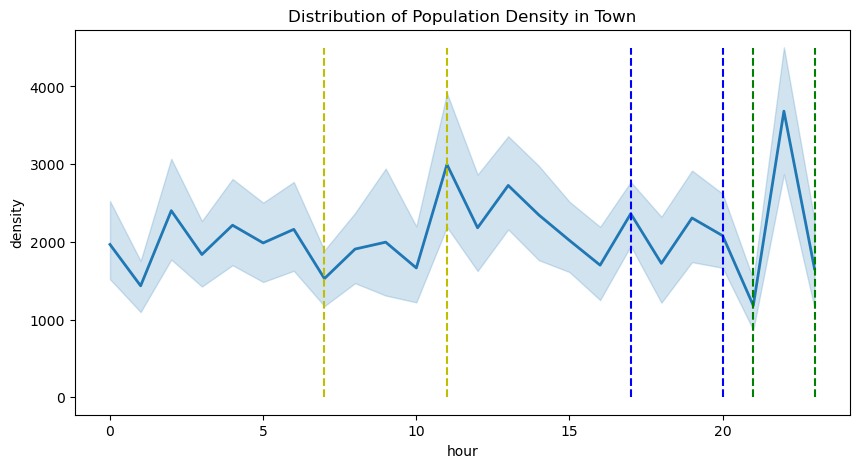

In [7]:
# Sense check of randomized area_code
# Without the area code
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'hour', y = 'density', 
             estimator = sum, linewidth = 2)
plt.vlines(x=[7,11,17,20,21,23],ymin=0,ymax=4500,
           linestyle='dashed',colors=['y','y','b','b','g','g'])
plt.title('Distribution of Population Density in Town');

**Interpretation:**
- There are spikes in population density between yellow line suggests an increment during working hours
- Peaks at around 13.00 hrs and slowly reduces, and peaks again at 23.00 hrs
- Further investigation breaking down by `customer_profile_segment` will be conducted to explain this area in a better sense

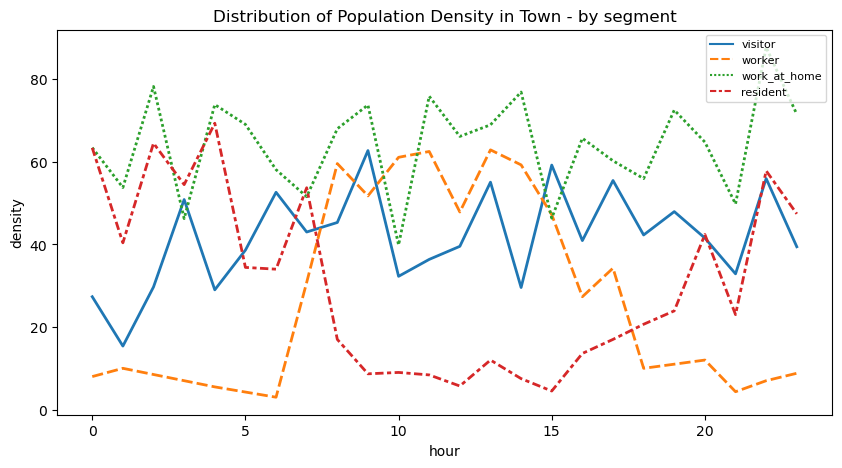

In [8]:
# Sense check of randomized area_code
# Without the area code
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'hour', y = 'density',
             hue='segment', estimator = 'mean',
             err_style=None, linewidth = 2, style = 'segment')
plt.title('Distribution of Population Density in Town - by segment');
plt.legend(fontsize=8);

### 3.3 Time of the day

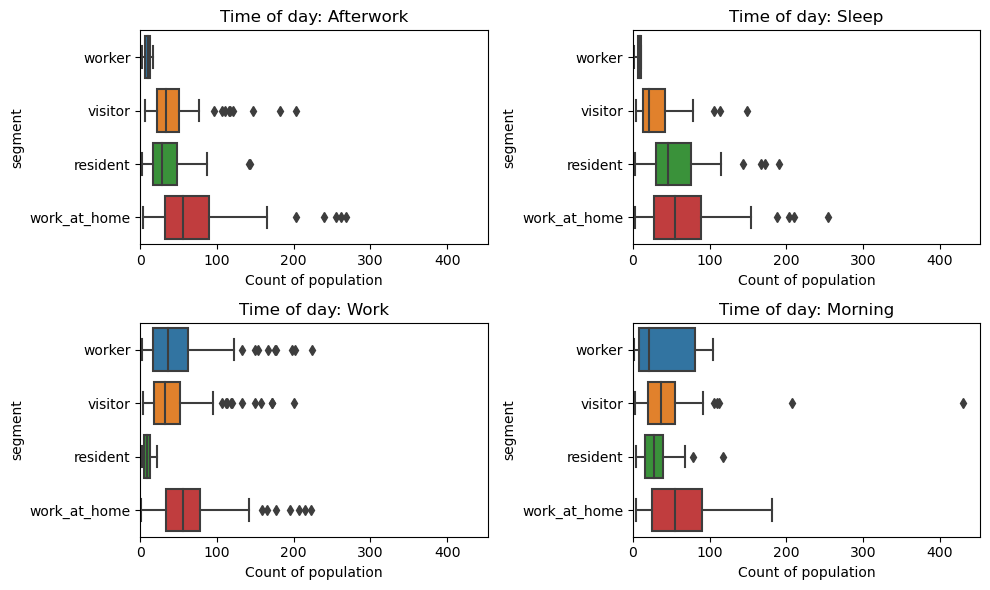

In [9]:
# set up figure
plt.figure(figsize=(10,6))
ordering = ['worker','visitor','resident','work_at_home']

# loop through time of day
for n,time in enumerate(df['time_of_day'].unique()):
    # set up subplot
    axs = plt.subplot(2,2,n+1)
    # subset of df based on time of day
    subset = df[df['time_of_day']==time]
    # create a plot
    sns.boxplot(x='density', y='segment', data=subset, ax=axs, 
                order = ordering)
    # set up x range
    max_x = max(df['density'])
    axs.set_xlabel('Count of population')
    axs.set_xlim([0,max_x*1.05])
    axs.set_title(f"Time of day: {time}")
    
plt.tight_layout();

**Interpretation:**
- Similar to the lineplot throughout the day with `worker` lower during sleep time and `resident` lower during worktime
- What's interesting is the almost similar distribution of `resident` and `work_at_home` suggesting they number of those two in this town is very similar (i.e. 50% work_at_home and 50% work somewhere else)
- However, not that there are `many outliers` shown from the boxplot (we may have to group them up into dense, medium, low population density tier)

### 3.4 Distribution of demographic

In [10]:
# Check out the totol population sampled
population = df['density'].sum()
print(f"The total sampled population is {population} people")

The total sampled population is 50045 people


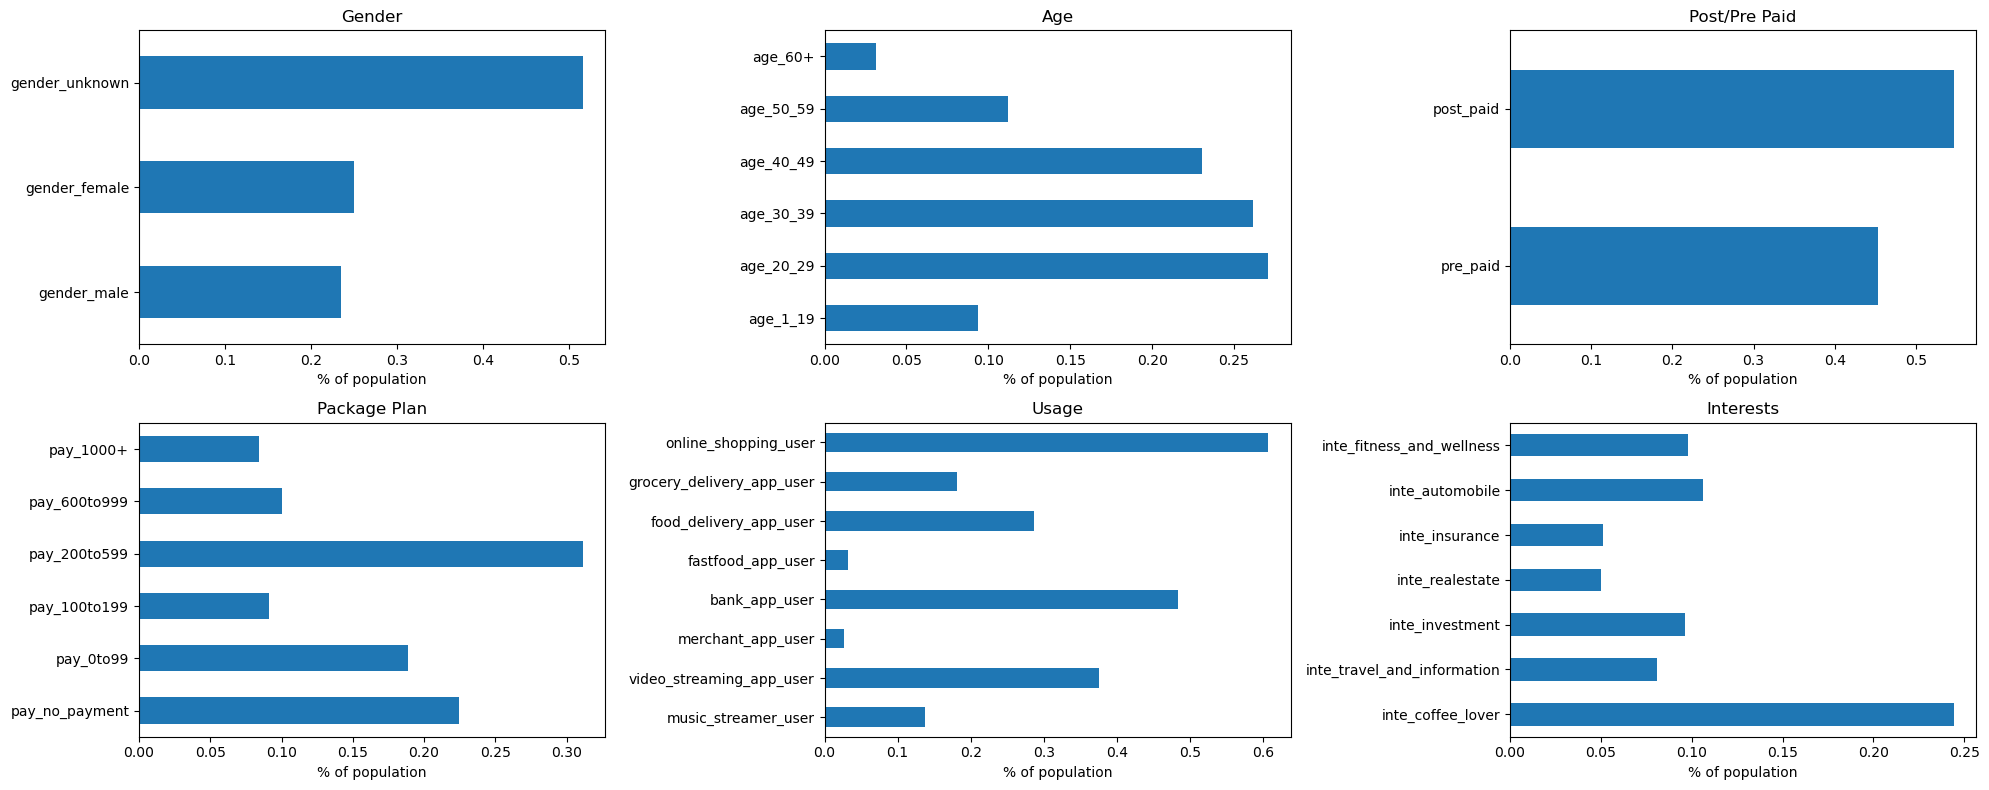

In [11]:
# Set up figure and loop through categories
plt.figure(figsize=(20,8))

for n,col in enumerate(col_cat):
    axs = plt.subplot(2,3,n+1)
    (df[col].sum()/population).plot(kind='barh')
    axs.set_title(f"{col_cat_name[n]}")
    axs.set_xlabel("% of population")

plt.tight_layout();

**Interpretation:**
- Majority of the people did not reveal their gender
- Majority of package plan owners own 200-599 THB
- Majority of the sample ages between 20-49 years old
- Online shopping users are more popular followed by bank apps
- Coffee lover are measured more than other topic of interests
- Post vs Pre paid are similarly distributed

### 3.5 Correlation of groups

In [12]:
def category_corr(group1,group2,size=(6,6)):
    # Showing correlation of two groups of columns
    merged = []
    plt.figure(figsize=size)
    merged = df[group1+group2]
    sns.heatmap(merged.corr().round(2),
                annot=True,mask = np.triu(merged.corr()),
                vmin=0,vmax=1,cmap='coolwarm');

**Age & Package Plan**

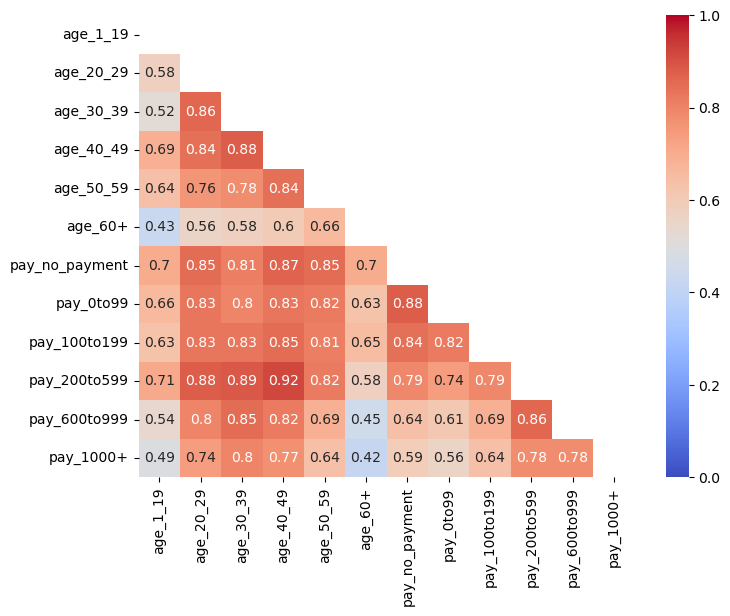

In [13]:
category_corr(AGE,PLAN,size=(8,6))

**Interpretation:**
- Higher spending groups of people are among 30-39 years of age
- People spend less on package plan as age increases

**Age & Usage**

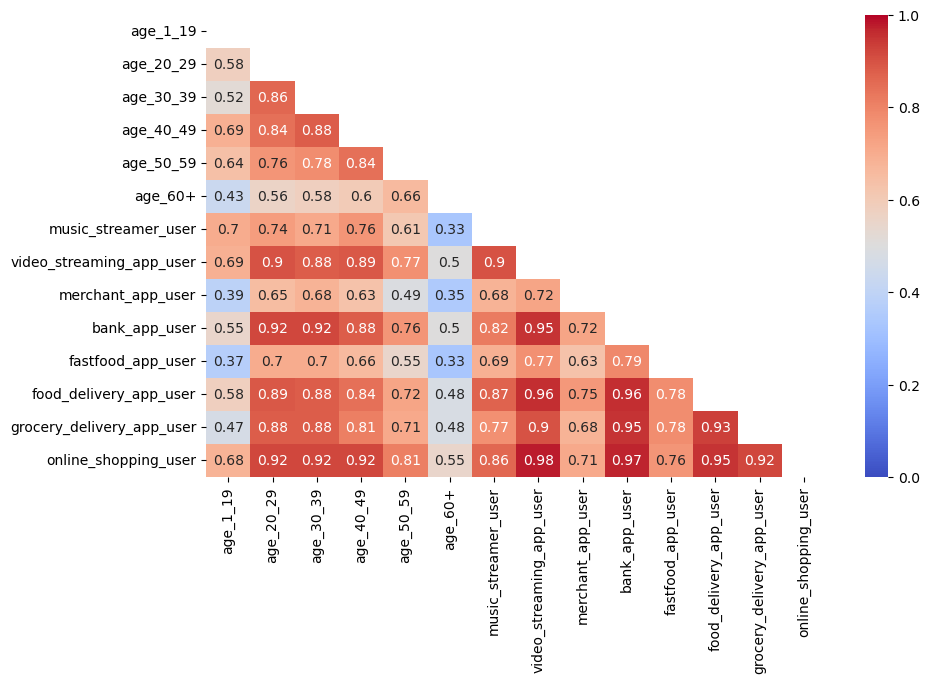

In [14]:
category_corr(AGE,USER,size=(10,6))

**Interpretation:**
- Young and Old age group has the lowest correlation with usage
- Middle age group has similar correlation to apps usage
- Apps that have higher correlations in usage are video streaming, online shopping, food delivery, and grocery

**Plan & Usage**

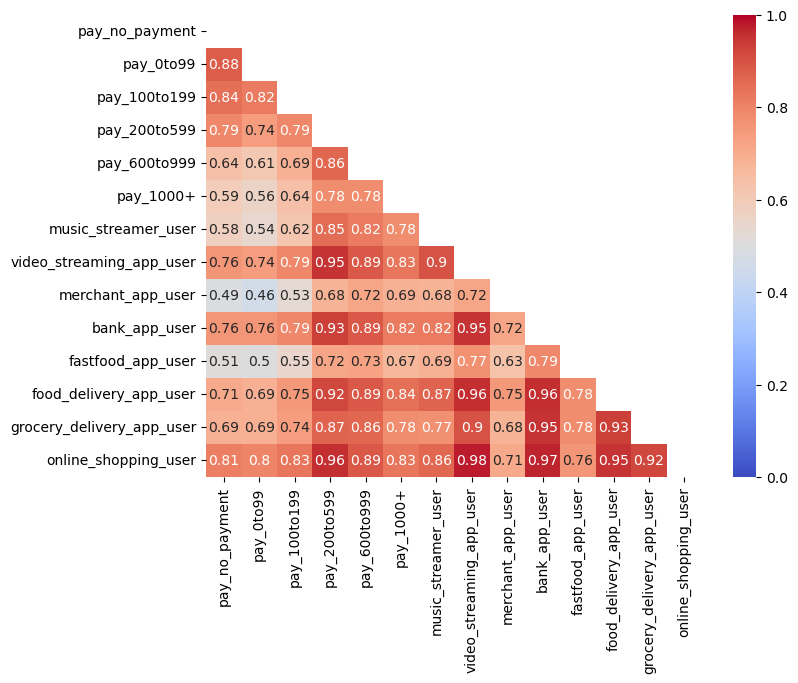

In [15]:
category_corr(PLAN,USER, size = (8,6))

**Interpretation:**
- As expected application usage correlates to the package plan
- Lower correlation from pay_1000+ due to the fact that not many people pay for this much, while lower payment plan uses the app as well so relatively it correlates not as well as payment 200-599

**Plan & Interest**

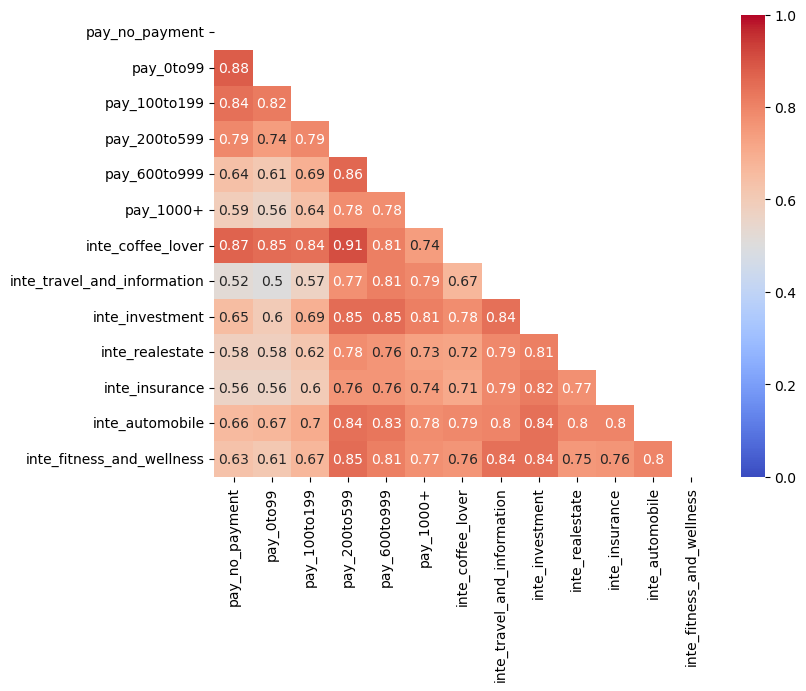

In [16]:
category_corr(PLAN,INTE, size = (8,6))

**Interpretation:**
- Higher paying customer correlates well with interests in investments

---